# New Tables: City level

* Faire les tableaux suivants:
  * Tableau 4: Kuznet: benchmark → Revision
      * Trouver un tableau avec les déciles pour montrer:
        * turning point croissant pour des villes avec une dominance étatique de plus en plus large
      * Regarder si gdp/cap prix constant
      * Indiquer les turning points dans les tableaux
* Partie 6:
  * Tableau 8: 
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Echantillonnage → prendre soit industry soit city industry
      * Big
        * Via Herfhindal 
          * benchmark →Revision
      * Foreign 
        * via output/capital/employment 
      * SOEs
        * via output/capital/employment 
      * SPZ
      * Coastal
    * Chaque tableau avec Panel A pour supérieur threshold, Panel B pour inférieur threshold
  * Tableau 9:
    * Enlever SPZ & Coastal
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Idem tableau 8
    
## Summary

### Size

| Size                       |              |              |              |              |              |              |
|----------------------------|--------------|--------------|--------------|--------------|--------------|--------------|
|                            | Below Median | Below Median | Below Median | Above Median | Above Median | Above Median |
| TCZ * Period * Polluted    | -            |              | -            | -            |              | -*           |
| Target * Period * Polluted |              | -***         | -***         |              | +            | +            |

### Output

|                            | Below median |     |         |     |         |     | Above Median |     |         |     |         |     |
|----------------------------|--------------|-----|---------|-----|---------|-----|--------------|-----|---------|-----|---------|-----|
|                            | Foreign      | SOE | Foreign | SOE | Foreign | SOE | Foreign      | SOE | Foreign | SOE | Foreign | SOE |
| TCZ * Period * Polluted    | -            | -   |         |     | -       | -   | -            | -** |         |     | -       | -   |
| Target * Period * Polluted |              |     | -       | -** | -       | -** |              |     | -**     | -** | -**     | -*  |

### Capital

|                            | Below median |     |         |     |         |     | Above Median |     |         |     |         |     |
|----------------------------|--------------|-----|---------|-----|---------|-----|--------------|-----|---------|-----|---------|-----|
|                            | Foreign      | SOE | Foreign | SOE | Foreign | SOE | Foreign      | SOE | Foreign | SOE | Foreign | SOE |
| TCZ * Period * Polluted    | -            | -   |         |     | -       | -   | -**          | -*  |         |     | -**     | -   |
| Target * Period * Polluted |              |     | -       | -** | -       | -** |              |     | -**     | -** | -*      | -*  |


### employment

|                            | Below median |     |         |     |         |     | Above Median |     |         |     |         |     |
|----------------------------|--------------|-----|---------|-----|---------|-----|--------------|-----|---------|-----|---------|-----|
|                            | Foreign      | SOE | Foreign | SOE | Foreign | SOE | Foreign      | SOE | Foreign | SOE | Foreign | SOE |
| TCZ * Period * Polluted    | -            | -   |         |     | -       |     | -**          | -*  |         |     | -*      | -   |
| Target * Period * Polluted |              |     | **      | -** | -**     | -** |              |     | -**     | -** | -*      | -*  |



In [1]:
import pandas as pd
from Fast_connectCloud import connector
import numpy as np

In [2]:
import sys
sys.path.insert(0,'..')

In [3]:
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

In [4]:
gs = connector.open_connection(online_connection = False,
                              path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth')

service = gs.connect_remote('GCP')

Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0xa27f22190> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0xa27f22ad0> and accessible with "bigquery_account"


In [5]:
%put df_final --to R

from GoogleDrivePy.google_platform import connect_cloud_platform
project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project, 
                                             service_account = service['GoogleCloudP'])    
query = (
          "SELECT * "
            "FROM China.SBC_pollution_China "

        )

df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_final.head()

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,effort_c,industry,ind2,Short,output_fcit,capital_fcit,labour_fcit,out_share_SOE,cap_share_SOE,lab_share_SOE,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
0,2002,Before,Shanxi,Central,Central,False,Yuncheng,1408,TCZ,0.485030,Above,3329,33,Smelting Non-ferrous Metals,0.000687,0.000293,0.00036,0.027567,0.221018,0.113467,24500,168934.454545,0.0,500,Above,Below,Above,11104,1573,889
1,2006,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.000950,0.000148,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,300,Above,Below,Above,11105,1574,420
2,2007,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.001715,0.000365,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,240,Above,Below,Above,11105,1572,421
3,2007,After,Liaoning,Northeast,Eastern,True,Jinzhou,2107,TCZ,0.080512,Below,3329,33,Smelting Non-ferrous Metals,0.007730,0.001296,0.00089,0.027567,0.221018,0.113467,3200,168934.454545,0.0,0,Above,Below,Above,11103,1572,287
4,2002,Before,Liaoning,Northeast,Eastern,True,Shenyang,2101,TCZ,0.230076,Above,3329,33,Smelting Non-ferrous Metals,0.000997,0.000052,0.00135,0.027567,0.221018,0.113467,3840,168934.454545,0.0,3500,Above,Below,Above,11106,1573,432


/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(df, _pandas_api.pd.SparseDataFrame):


Get the industries available in our dataset, so that we match the firm level table

In [6]:
list_city = df_final['geocode4_corr'].to_list()

In [7]:
options(warn=-1)
library(tidyverse)
library(lfe)
library(lazyeval)
library('progress')

path = "../functions/SBC_pollution_R.R"
source(path)
path = "../functions/SBC_pollutiuon_golatex.R"
source(path)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lazyeval’


The following objects are masked from ‘package:purrr’:

    is_atomic, is_formula



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [8]:
df_final <- df_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )
head(df_final)

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,⋯,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2002,Before,Shanxi,Central,Central,FALSE,Yuncheng,1408,TCZ,0.48502998,⋯,24500,168934.5,0,500,Above,Below,Above,11104,1573,889
2,2006,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,300,Above,Below,Above,11105,1574,420
3,2007,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,240,Above,Below,Above,11105,1572,421
4,2007,After,Liaoning,Northeast,Eastern,TRUE,Jinzhou,2107,TCZ,0.08051164,⋯,3200,168934.5,0,0,Above,Below,Above,11103,1572,287
5,2002,Before,Liaoning,Northeast,Eastern,TRUE,Shenyang,2101,TCZ,0.23007570,⋯,3840,168934.5,0,3500,Above,Below,Above,11106,1573,432
6,2002,Before,Guangdong,Coastal,Eastern,TRUE,Meizhou,4414,No_TCZ,0.02596999,⋯,72752,168934.5,15500,115000,Above,Below,Above,11107,1573,909


# Partie 6

## Tableau 8 A and B 

Estimate the following models using different subsamples:

### Model A 

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \times \text{ Share X}_i \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

* Size
    * Via Herfhindal 
        * benchmark →Revision
* Foreign 
    * via output/capital/employment 
* SOEs
    * via output/capital/employment 
* SPZ
* Coastal

## Load Data

### Compute Herfhindal: proxy Size

$$
H=\sum_{i=1}^{N} s_{i}^{2}
$$

where $s_i$ is the market share of industry $i$ in a city, and $N$ is the number of firms. 

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city-industry: `market_share_cit`
- Step 2: compute the sum of squared market share by city: `Herfindahl_ct`
- Step 3: Compute the average across time: `Herfindahl_c`
- Step 4: Compute the deciles of step 3: `decile_herfhindal_c`
    - Low decile implies a low concentration within sectors
    - High decile implies a high concentration within sectors

In [9]:
query = """
WITH sum_cit AS (
  SELECT geocode4_corr, cic, sum(output) as sum_o_cit, year
  FROM China.asif_firm_china 
  WHERE year >= 2002 AND year <= 2007
  GROUP BY geocode4_corr, cic, year
) 
SELECT * 
FROM 
  (WITH sum_ct AS (
    SELECT geocode4_corr, SUM(sum_o_cit) as sum_o_ct, year
    FROM sum_cit
    WHERE year >= 2002 AND year <= 2007
    GROUP BY year, geocode4_corr
)
SELECT *
FROM
  (WITH ms_cit AS (
    SELECT  sum_cit.cic, sum_cit.geocode4_corr, sum_cit.year,
    sum_cit.sum_o_cit/NULLIF(sum_ct.sum_o_ct, 0) as market_share_cit
    FROM sum_cit
    LEFT JOIN sum_ct
ON (
sum_cit.year = sum_ct.year AND 
sum_cit.geocode4_corr = sum_ct.geocode4_corr
)
)
SELECT *
FROM
  (WITH agg_1 AS (
SELECT geocode4_corr, SUM(POW(market_share_cit, 2)) as Herfindahl_ct,
year
FROM ms_cit
GROUP BY year, geocode4_corr
ORDER BY year, geocode4_corr 
)
SELECT geocode4_corr, AVG(Herfindahl_ct) as Herfindahl_c
FROM agg_1
GROUP BY geocode4_corr
ORDER BY geocode4_corr
)))
"""
df_herfhindal = (gcp.upload_data_from_bigquery(query = query,
                                         location = 'US')
                 .loc[lambda x: x['geocode4_corr'].isin(list_city)]
                )
df_herfhindal.shape

(228, 2)

### Compute Ownership: proxy Foreign/SOE

$$\sum output_{io}/ \sum output_i$$

- with $i$ stands for industry
- $o$ stands for ownership (Foreign vs Domestic or SOE vs private)



#### Foreign vs domestic

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city, ownership (Foreign/Domestic): `Share_X_co`
- Step 2: Compute dummy when share Foreign above share domestic by city
- Step 3: Compute decile by city-ownership
    - Note,  high decile in Foreign means the city has relatively high share of foreign output, but not in absolule value as in step 2. A decile 9 in foreign can be a decile 2 or 3 in Domestic

In [10]:
query_share_foreign = """ 
WITH sum_co AS (
  SELECT 
    case WHEN ownership = 'Foreign' THEN 'FOREIGN' ELSE 'DOMESTIC' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_co, 
    SUM(fa_net / 10000000) as fa_net_co, 
    SUM(employment / 100000) as employment_co,
    geocode4_corr
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    geocode4_corr
) 
SELECT 
  * 
FROM 
  (
    WITH sum_c AS(
      SELECT 
        SUM(output_co) as output_c, 
        SUM(fa_net_co) as fa_net_c, 
        SUM(employment_co) as employment_c, 
        geocode4_corr AS geocode4_corr_b
      FROM 
        sum_co 
      GROUP BY 
        geocode4_corr
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_co AS(
          SELECT 
            OWNERSHIP, 
            output_co / output_c AS share_output_co, 
            fa_net_co / fa_net_c AS share_fa_net_co, 
            employment_co / employment_c AS share_employement_co, 
            geocode4_corr
          FROM 
            sum_co 
            LEFT JOIN sum_c ON sum_co.geocode4_corr = sum_c.geocode4_corr_b 
        ) 
        SELECT 
        geocode4_corr,
        OWNERSHIP,  
          share_output_co,
          share_fa_net_co,
          share_employement_co
        FROM share_co
        WHERE OWNERSHIP = 'FOREIGN'
        )
        )
"""
df_share_foreign = (gcp.upload_data_from_bigquery(query = query_share_foreign,
                                         location = 'US')
                    .loc[lambda x: x['geocode4_corr'].isin(list_city)]
                   )
df_share_foreign.shape
#df_share_foreign['rank_share_output_i'].value_counts().sort_index()

(220, 5)

In [11]:
#df_share_foreign_ = (df_share_foreign
# .set_index(['industry', 'OWNERSHIP'])
# .drop(columns = ['rank_share_output_i',
#                  'rank_share_capital_i',
#                  'rank_share_employement_i'])
# .unstack(-1)
# .fillna(0)
# .assign(
# output = lambda x: np.where(
#     x.iloc[:,1] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     capital = lambda x: np.where(
#     x.iloc[:,3] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     employment = lambda x: np.where(
#     x.iloc[:,5] > x.iloc[:,0],
#     'Above', 'Below'
# )
# )
# .iloc[:, -3:]
# .droplevel(level = 1, axis = 1)
# .reset_index()
#)
#for i in ['output','capital', 'employment']:
#    print(df_share_foreign_[i].value_counts().sort_index())

In [12]:
#df_share_foreign =  (df_share_foreign
# .set_index(['industry','OWNERSHIP'])
# .drop(columns = ['share_output_io',
#                  'share_fa_net_io',
#                  'share_employement_io'])
# .xs('FOREIGN', level='OWNERSHIP', axis=0)
# .reset_index()
# .merge(df_share_foreign_)
#)

#### SOE

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city, ownership (SOE/Private): `Share_X_co`
- Step 2: Compute dummy when share SOE above share Private by city
- Step 3: Compute decile by city-ownership
    - Note,  high decile in SOE means the city has relatively high share of SOE output, but not in absolule value as in step 2. A decile 9 in SOE can be a decile 2 or 3 in Private

In [13]:
query_share_soe = """ 
WITH sum_co AS (
  SELECT 
    case WHEN ownership = 'SOE' THEN 'SOE' ELSE 'PRIVATE' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_co, 
    SUM(fa_net / 10000000) as fa_net_co, 
    SUM(employment / 100000) as employment_co,
    geocode4_corr
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    geocode4_corr
) 
SELECT 
  * 
FROM 
  (
    WITH sum_c AS(
      SELECT 
        SUM(output_co) as output_c, 
        SUM(fa_net_co) as fa_net_c, 
        SUM(employment_co) as employment_c, 
        geocode4_corr AS geocode4_corr_b
      FROM 
        sum_co 
      GROUP BY 
        geocode4_corr
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_co AS(
          SELECT 
            OWNERSHIP, 
            output_co / output_c AS share_output_co, 
            fa_net_co / fa_net_c AS share_fa_net_co, 
            employment_co / employment_c AS share_employement_co, 
            geocode4_corr
          FROM 
            sum_co 
            LEFT JOIN sum_c ON sum_co.geocode4_corr = sum_c.geocode4_corr_b 
        ) 
        SELECT 
        geocode4_corr,
        OWNERSHIP,  
          share_output_co,
          share_fa_net_co,
          share_employement_co
        FROM share_co
        WHERE OWNERSHIP = 'SOE'
        )
        )
"""
df_share_soe = (gcp.upload_data_from_bigquery(query = query_share_soe,
                                         location = 'US')
                .loc[lambda x: x['geocode4_corr'].isin(list_city)]
                   )
df_share_soe.shape
#df_share_soe['rank_share_output_i'].value_counts().sort_index()

(228, 5)

In [14]:
#df_share_soe_ = (df_share_soe
# .set_index(['industry', 'OWNERSHIP'])
# .drop(columns = ['rank_share_output_i',
#                  'rank_share_capital_i',
#                  'rank_share_employement_i'])
# .unstack(-1)
# .fillna(0)
# .assign(
# output = lambda x: np.where(
#     x.iloc[:,1] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     capital = lambda x: np.where(
#     x.iloc[:,3] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     employment = lambda x: np.where(
#     x.iloc[:,5] > x.iloc[:,0],
#     'Above', 'Below'
# )
# )
# .iloc[:, -3:]
# .droplevel(level = 1, axis = 1)
# .reset_index()
#)

#for i in ['output','capital', 'employment']:
#    print(df_share_soe_[i].value_counts().sort_index())

In [15]:
#df_share_soe = (df_share_soe
# .set_index(['industry','OWNERSHIP'])
# .drop(columns = ['share_output_io',
#                  'share_fa_net_io',
#                  'share_employement_io'])
# .xs('SOE', level='OWNERSHIP', axis=0)
# .reset_index()
# .merge(df_share_soe_)
 #.loc[lambda x: x.index.get_level_values('OWNERSHIP').isin(['FOREIGN'])]
#)
#df_share_soe.head()

### Load TCZ_list_china from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [16]:
### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range

#sheetid = '15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q'
#sheetname = 'All_cities'

#df_TCZ_list_china = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
#sheetName = sheetname,
#	 to_dataframe = True)
#df_TCZ_list_china.to_csv('df_TCZ_list_china.csv', index = False)

In [17]:
df_TCZ_list_china = read_csv('../df_TCZ_list_china.csv') %>% 
select(-c(TCZ, Province)) %>% 
left_join(df_final)

Parsed with column specification:
cols(
  Province = col_character(),
  City = col_character(),
  geocode4_corr = col_double(),
  TCZ = col_double(),
  SPZ = col_double()
)

Joining, by = "geocode4_corr"



### Add to table

In [18]:
%put df_herfhindal_final --to R
df_herfhindal_final = (df_final.merge(df_herfhindal,
                                     on=['geocode4_corr'],
                                     how='left',
                                     indicator=True
                                     )
                       .assign(
                       decile_herfhindal_c = lambda x:
                           pd.qcut(x['Herfindahl_c'],10, labels=False)
                       )
                      )

INFO: NumExpr defaulting to 8 threads.

In [19]:
print('Median: {}'.format(df_herfhindal_final['Herfindahl_c'].median()))
print(pd.qcut(df_herfhindal_final['Herfindahl_c'],
        10).drop_duplicates().sort_values().reset_index(drop = True))

df_herfhindal_final['decile_herfhindal_c'].value_counts().sort_index()

Median: 0.053892241145775545
0    (0.0162, 0.0245]
1    (0.0245, 0.0313]
2    (0.0313, 0.0367]
3    (0.0367, 0.0428]
4    (0.0428, 0.0539]
5    (0.0539, 0.0688]
6    (0.0688, 0.0737]
7     (0.0737, 0.101]
8      (0.101, 0.158]
9      (0.158, 0.828]
Name: Herfindahl_c, dtype: category
Categories (10, interval[float64]): [(0.0162, 0.0245] < (0.0245, 0.0313] < (0.0313, 0.0367] <
                                     (0.0367, 0.0428] ... (0.0688, 0.0737] < (0.0737, 0.101] <
                                     (0.101, 0.158] < (0.158, 0.828]]


0    3118
1    3045
2    3220
3    2918
4    3172
5    2964
6    3113
7    3022
8    3045
9    3059
Name: decile_herfhindal_c, dtype: int64

In [20]:
df_herfhindal_r <- df_herfhindal_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [21]:
%put df_final_SOE --to R
df_final_SOE = (df_final.merge(
    df_share_soe,
    on = ['geocode4_corr'],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x['share_output_co'],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x['share_fa_net_co'],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x['share_employement_co'],10, labels=False)                    
                    
                       )

)
for i in ['output', 'capital', 'employment']:
    if i == 'output':
        v = 'share_output_co'
    elif i =='capital':
        v = 'share_fa_net_co'
    else:
        v = 'share_employement_co'
    print('Median: {}'.format(df_final_SOE[v].median()))
    print(pd.qcut(df_final_SOE[v],
        10).drop_duplicates().sort_values().reset_index(drop = True))

    print(df_final_SOE[i].value_counts().sort_index())

Median: 0.13739489160073137
0    (0.00017, 0.0186]
1     (0.0186, 0.0548]
2     (0.0548, 0.0755]
3      (0.0755, 0.104]
4       (0.104, 0.137]
5       (0.137, 0.198]
6        (0.198, 0.26]
7         (0.26, 0.39]
8          (0.39, 0.5]
9         (0.5, 0.955]
Name: share_output_co, dtype: category
Categories (10, interval[float64]): [(0.00017, 0.0186] < (0.0186, 0.0548] < (0.0548, 0.0755] <
                                     (0.0755, 0.104] ... (0.198, 0.26] < (0.26, 0.39] < (0.39, 0.5] <
                                     (0.5, 0.955]]
0    3068
1    3124
2    3289
3    2868
4    3069
5    3236
6    2857
7    3120
8    2982
9    3063
Name: output, dtype: int64
Median: 0.27773265829152016
0    (0.00119, 0.0448]
1     (0.0448, 0.0917]
2      (0.0917, 0.128]
3       (0.128, 0.184]
4       (0.184, 0.278]
5       (0.278, 0.333]
6       (0.333, 0.431]
7       (0.431, 0.518]
8       (0.518, 0.664]
9       (0.664, 0.942]
Name: share_fa_net_co, dtype: category
Categories (10, interval[float6

In [47]:
df_final['out_share_SOE'].describe()

count    30676.000000
mean         0.138741
std          0.151847
min          0.000000
25%          0.035187
50%          0.084363
75%          0.190183
max          0.998977
Name: out_share_SOE, dtype: float64

In [49]:
df_final['cap_share_SOE'].mean()

0.211815687347217

In [50]:
df_final['lab_share_SOE'].mean()

0.17900359817137876

In [22]:
df_final_SOE <- df_final_SOE %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [23]:
%put df_final_FOREIGN --to R
df_final_FOREIGN = (df_final.merge(
    df_share_foreign,
    on = ['geocode4_corr'],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x['share_output_co'],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x['share_fa_net_co'],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x['share_employement_co'],10, labels=False),
                       )

)
for i in ['output', 'capital', 'employment']:
    if i == 'output':
        v = 'share_output_co'
    elif i =='capital':
        v = 'share_fa_net_co'
    else:
        v = 'share_employement_co'
    print('Median: {}'.format(df_final_FOREIGN[v].median()))
    print(pd.qcut(df_final_FOREIGN[v],
        10).drop_duplicates().sort_values().reset_index(drop = True))

    print(df_final_FOREIGN[i].value_counts().sort_index())

Median: 0.07527693738975534
0     (-0.000849, 0.0222]
1        (0.0222, 0.0334]
2        (0.0334, 0.0518]
3        (0.0518, 0.0695]
4        (0.0695, 0.0753]
5        (0.0753, 0.0889]
6         (0.0889, 0.126]
7          (0.126, 0.163]
8          (0.163, 0.252]
9          (0.252, 0.696]
10                    NaN
Name: share_output_co, dtype: category
Categories (10, interval[float64]): [(-0.000849, 0.0222] < (0.0222, 0.0334] < (0.0334, 0.0518] <
                                     (0.0518, 0.0695] ... (0.0889, 0.126] < (0.126, 0.163] <
                                     (0.163, 0.252] < (0.252, 0.696]]
0.0    3053
1.0    3092
2.0    3187
3.0    3008
4.0    3167
5.0    2873
6.0    3251
7.0    3000
8.0    2882
9.0    2960
Name: output, dtype: int64
Median: 0.08430729065815916
0     (-0.000468, 0.0215]
1        (0.0215, 0.0354]
2        (0.0354, 0.0566]
3        (0.0566, 0.0706]
4        (0.0706, 0.0843]
5        (0.0843, 0.0929]
6          (0.0929, 0.13]
7           (0.13, 0.164]
8   

In [24]:
df_final_FOREIGN <- df_final_FOREIGN %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

## Table 8 Model A: Panel A



### Decile

#### Size

In [25]:
change_target <- function(table){
    check_target <- grep("PeriodAfter:polluted_threAbove:target_c$", rownames(table$coef))
    
    if (length(check_target) !=0) {
    rownames(table$coefficients)[check_target] <- 'target_c:PeriodAfter:polluted_threAbove'
    rownames(table$beta)[check_target] <- 'target_c:PeriodAfter:polluted_threAbove'
}
    return (table)
}

In [26]:
cat <- 'Size'
df_to_filter <- df_herfhindal_r

### inferior median
t1 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c <= 5),
             exactDOF=TRUE)
t1 <-change_target(t1)
t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c <= 5),
             exactDOF=TRUE)
t2 <-change_target(t2)

t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c <= 5),
             exactDOF=TRUE)
t3 <-change_target(t3)

### superior median
t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c > 5),
             exactDOF=TRUE)
t4 <-change_target(t4)

t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c > 5),
             exactDOF=TRUE)
t5 <-change_target(t5)

t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_c > 5),
             exactDOF=TRUE)
t6 <-change_target(t6)

tables <- list(t1, t2, t3,t4, t5, t6)

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
            )


table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median Herfhindal - ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                            )

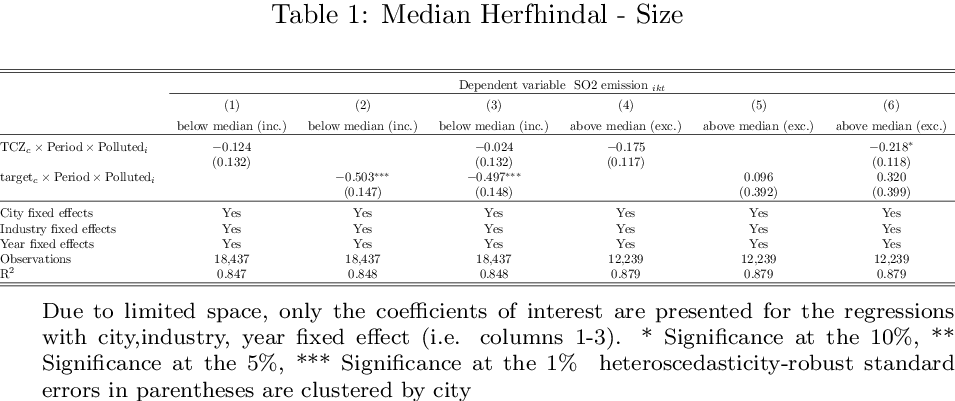

In [27]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

In [85]:
Herfhindal_option_distinct <- df_herfhindal_r %>%
select(geocode4_corr, Herfindahl_c) %>%
distinct() %>%
summary(mean(share_output_co))

Herfhindal_option_distinct

 geocode4_corr   Herfindahl_c    
 Min.   :1101   Min.   :0.01718  
 1st Qu.:3176   1st Qu.:0.04804  
 Median :3712   Median :0.07784  
 Mean   :3728   Mean   :0.12958  
 3rd Qu.:4417   3rd Qu.:0.14812  
 Max.   :6501   Max.   :0.82787  

In [86]:
mean <- 0.12958
df_to_filter <- df_herfhindal_r
var <- 'Herfhindal'
cat <- 'Size'

toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c < mean),
             exactDOF=TRUE)
t1 <-change_target(t1)
t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c < mean),
             exactDOF=TRUE)
t2 <-change_target(t2)
t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c < mean),
             exactDOF=TRUE)
t3 <-change_target(t3)

    ### superior median
t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c >= mean),
             exactDOF=TRUE)
t4 <-change_target(t4)
t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c >= mean),
             exactDOF=TRUE)
t5 <-change_target(t5)

t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Herfindahl_c >= mean),
             exactDOF=TRUE)
t6 <-change_target(t6)

tables_o <- list(t1, t2, t3,t4, t5, t6)
table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Mean ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )

[1] TRUE TRUE TRUE

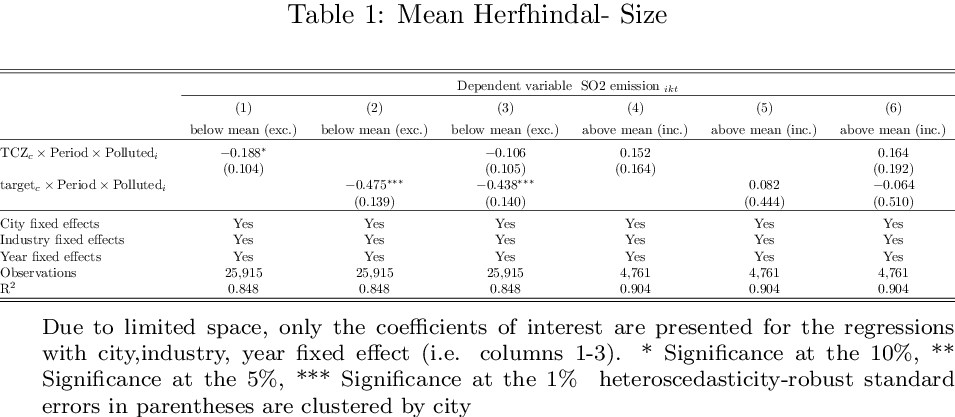

In [88]:
import os
decile=['& below mean (exc.)', 'below mean (exc.)', 'below mean (exc.)',
        'above mean (inc.)', 'above mean (inc.)', 'above mean (inc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

#### Foreign


In [28]:
cat <- 'Foreign'
df_to_filter <- df_final_FOREIGN

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

for (var in list('output', 'capital', 'employment')){
    
    ### inferior median
    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t2 <-change_target(t2)
    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### superior median
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t4 <-change_target(t4)
    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t6 <-change_target(t6)
    
    if (var == 'output'){
        tables_o <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )
    }else if ( var == 'capital'){
        tables_c <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_c,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }else{
        tables_e <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_e,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_3.txt"
                            )
    }
}

[1] TRUE TRUE TRUE

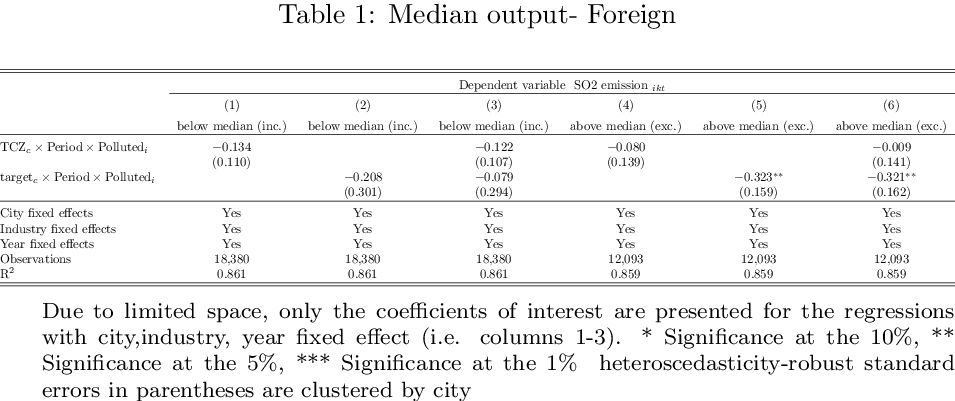

In [29]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

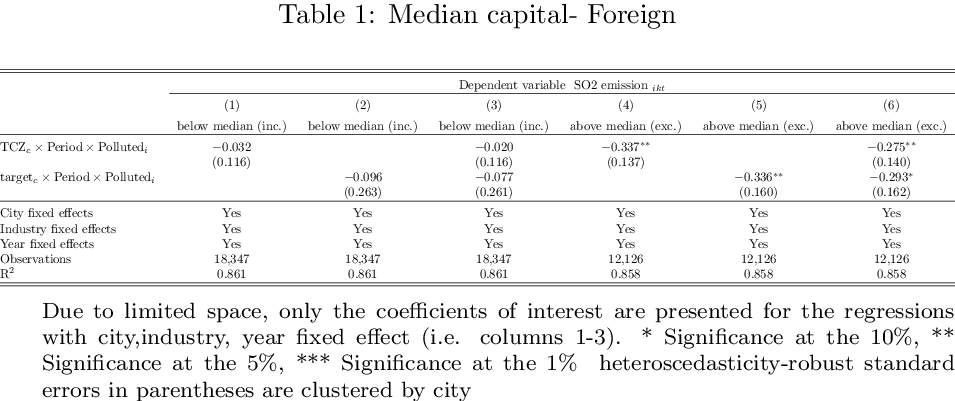

In [30]:
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True,
            resolution = 200)

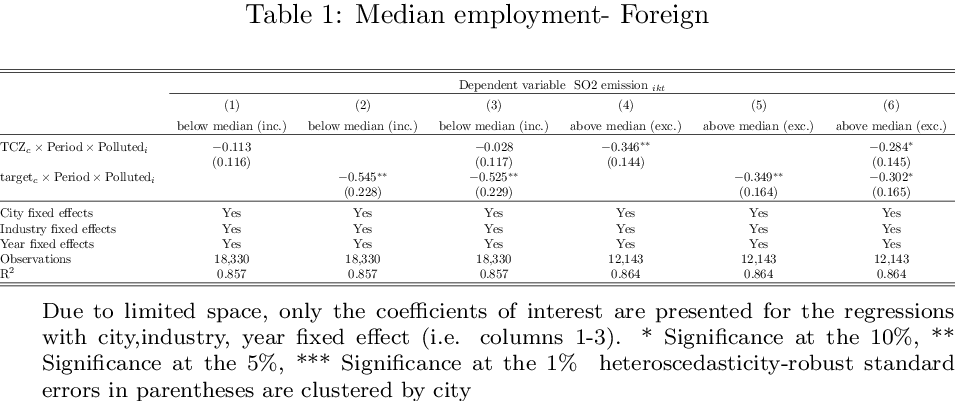

In [31]:
lb.beautify(table_number = 3,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True,
            resolution = 200)

Mean

In [80]:
Foreign_option_distinct <- df_final_FOREIGN %>%
select(geocode4_corr, share_output_co) %>%
distinct() %>%
summary(mean(share_output_co))

Foreign_option_distinct

 geocode4_corr  share_output_co   
 Min.   :1101   Min.   :0.000151  
 1st Qu.:3176   1st Qu.:0.028716  
 Median :3712   Median :0.063378  
 Mean   :3728   Mean   :0.104255  
 3rd Qu.:4417   3rd Qu.:0.127195  
 Max.   :6501   Max.   :0.695520  
                NA's   :8         

In [83]:
mean <- 0.104255
df_to_filter <- df_final_FOREIGN
var <- 'output'
cat <- 'Foreign'

toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t1 <-change_target(t1)
t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t2 <-change_target(t2)
t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t3 <-change_target(t3)

    ### superior median
t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t4 <-change_target(t4)
t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t5 <-change_target(t5)

t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t6 <-change_target(t6)

tables_o <- list(t1, t2, t3,t4, t5, t6)
table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Mean ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )

[1] TRUE TRUE TRUE

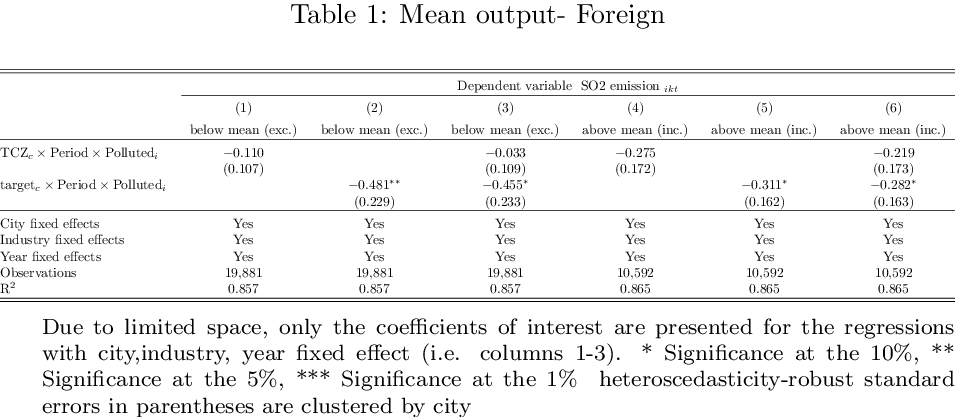

In [84]:
import os
decile=['& below mean (exc.)', 'below mean (exc.)', 'below mean (exc.)',
        'above mean (inc.)', 'above mean (inc.)', 'above mean (inc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

#### SOE

Test mean

In [59]:
#head(df_final_SOE)

In [74]:
SOE_option_distinct <- df_final_SOE %>%
select(geocode4_corr, share_output_co) %>%
distinct() %>%
summary(mean(share_output_co))

SOE_option_distinct

 geocode4_corr  share_output_co  
 Min.   :1101   Min.   :0.00117  
 1st Qu.:3176   1st Qu.:0.08091  
 Median :3712   Median :0.17592  
 Mean   :3728   Mean   :0.24950  
 3rd Qu.:4417   3rd Qu.:0.37849  
 Max.   :6501   Max.   :0.95502  

In [77]:
mean <- 0.24950
df_to_filter <- df_final_SOE
var <- 'output'

toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t1 <-change_target(t1)
t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t2 <-change_target(t2)
t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co < mean),
             exactDOF=TRUE)
t3 <-change_target(t3)

    ### superior median
t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t4 <-change_target(t4)
t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t5 <-change_target(t5)

t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(share_output_co >= mean),
             exactDOF=TRUE)
t6 <-change_target(t6)

tables_o <- list(t1, t2, t3,t4, t5, t6)
table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Mean ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )

[1] TRUE TRUE TRUE

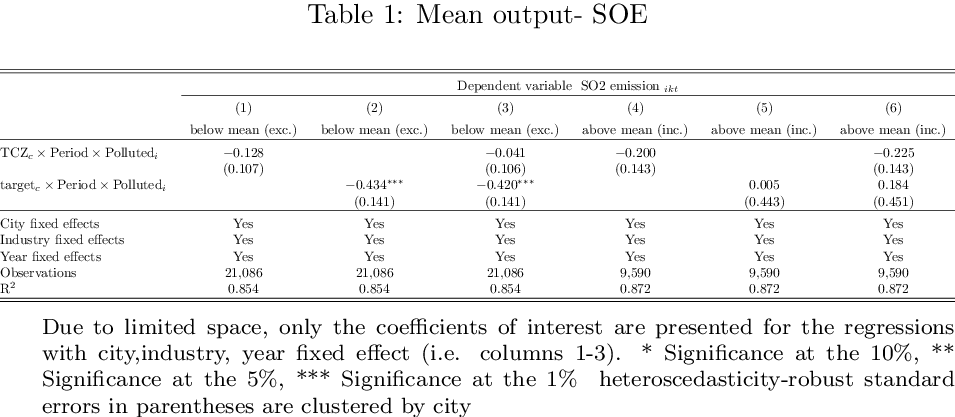

In [78]:
import os
decile=['& below mean (exc.)', 'below mean (exc.)', 'below mean (exc.)',
        'above mean (inc.)', 'above mean (inc.)', 'above mean (inc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

In [41]:
cat <- 'SOE'
df_to_filter <- df_final_SOE

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

decile <- 7
### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

for (var in list('output', 'capital', 'employment')){
    
    ### inferior median
    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= decile),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= decile),
             exactDOF=TRUE)
    t2 <-change_target(t2)
    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= decile),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### superior median
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > decile),
             exactDOF=TRUE)
    t4 <-change_target(t4)
    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > decile),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > decile),
             exactDOF=TRUE)
    t6 <-change_target(t6)
    
    if (var == 'output'){
        tables_o <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Decile ", decile, " & " , var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )
    }else if ( var == 'capital'){
        tables_c <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_c,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Decile ", decile, " & " , var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }else{
        tables_e <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_e,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Decile ", decile, " & " , var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_3.txt"
                            )
    }
}

[1] TRUE TRUE TRUE TRUE TRUE

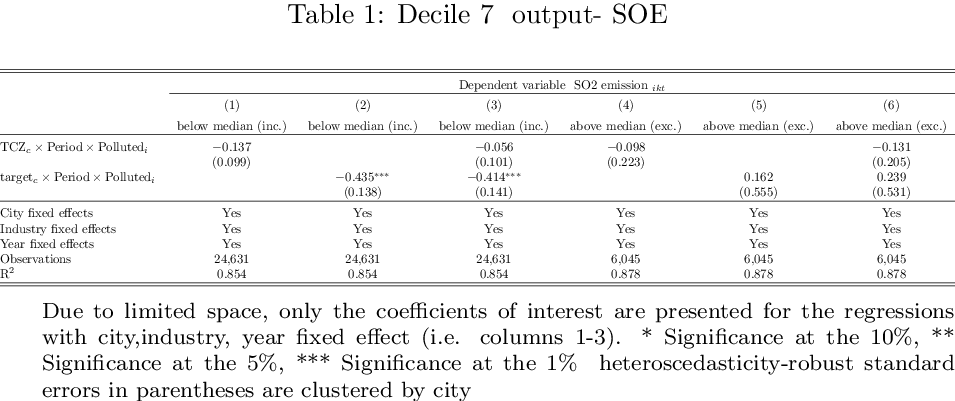

In [42]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

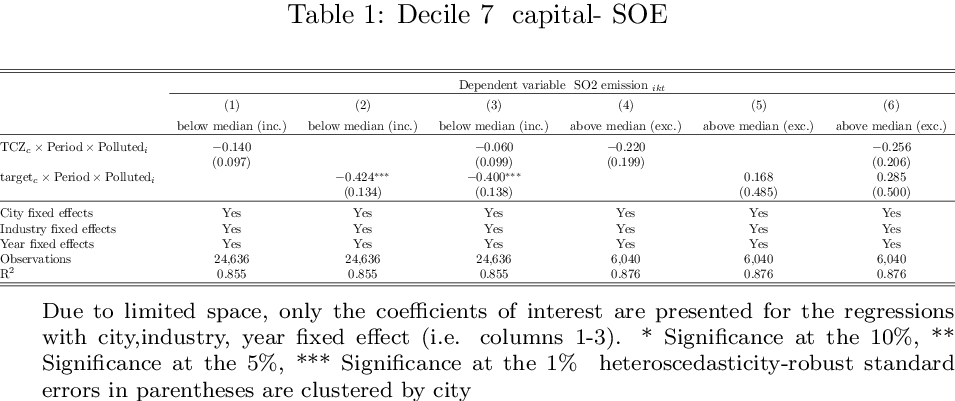

In [43]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

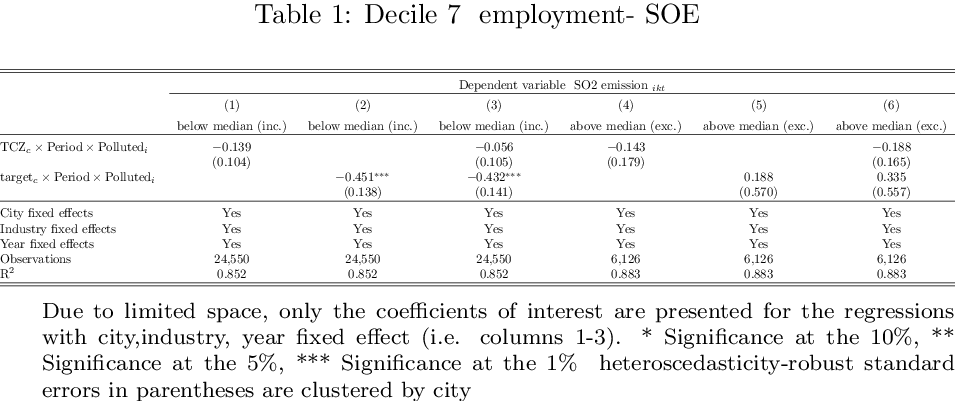

In [44]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 3,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

## SPZ/Coastal

In [36]:
df_to_filter <- df_TCZ_list_china
### SPZ

### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

for (var in range(1,2)){
    
    if (var == 1){
        filter_spz = 1
        filter_coast = TRUE
        filter_tcz = 'TCZ'
        
    }else if ( var == 2){
        
        filter_spz = 0
        filter_coast = FALSE
        filter_tcz = 'No_TCZ'
    }


    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t2 <-change_target(t2)

    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### Coastal
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t4 <-change_target(t4)

    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t6 <-change_target(t6)

    t7 <- felm(formula=log(tso2_cit) ~ 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final %>% filter(TCZ_c == filter_tcz),
             exactDOF=TRUE)
    t7 <-change_target(t7)
    
     if (var == 1){
        tables_1 <- list(t1, t2, t3,t4, t5, t6, t7)
        table_1 <- go_latex(tables_1,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title="SPZ/Coastal/TCZ True",
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                            )
        
    }else if (var == 2){
        
        tables_2 <- list(t1, t2, t3,t4, t5, t6, t7)
        table_1 <- go_latex(tables_2,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title="SPZ/Coastal/TCZ False",
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }
    
}

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

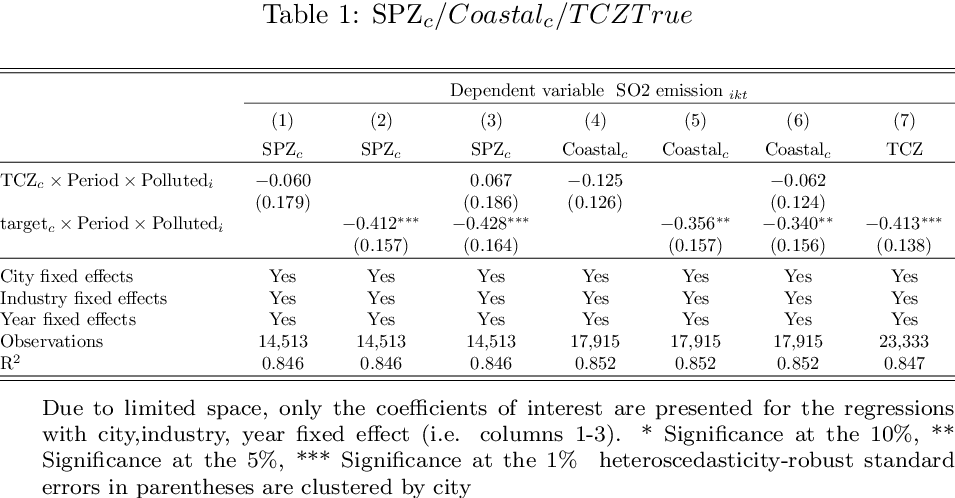

In [37]:
import os
decile=['& SPZ', 'SPZ', 'SPZ',
        'Coastal', 'Coastal', 'Coastal', 'TCZ']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

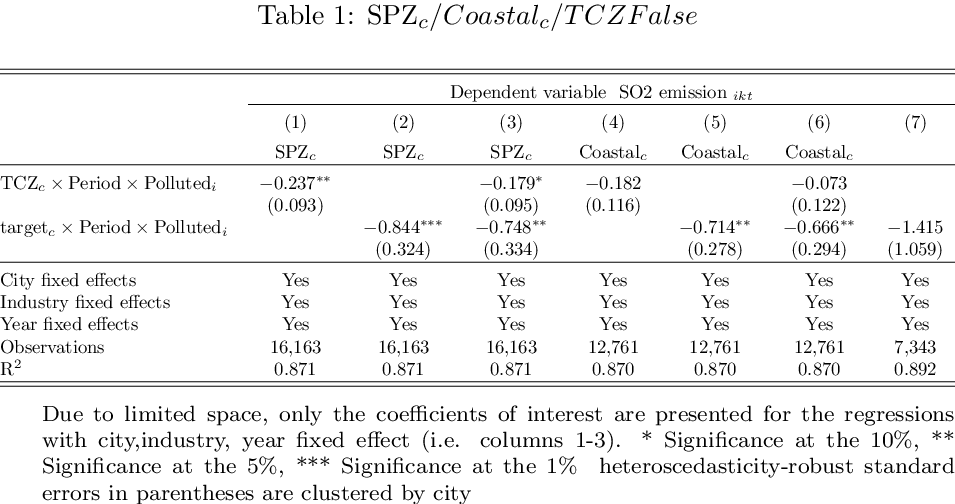

In [38]:
import os
decile=['& SPZ', 'SPZ', 'SPZ',
        'Coastal', 'Coastal', 'Coastal']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

# Create Report

In [ ]:
import os, time, shutil
from pathlib import Path

filename = '09_SBC_pollution_China_Revision_New_tables_c'
source = filename + '.ipynb'
source_to_move = filename + '.html'
path = os.getcwd()
parent_path = str(Path(path).parent)
path_report = "{}/Reports".format(parent_path)
dest = os.path.join(path_report, filename)+'.html'

os.system('jupyter nbconvert --no-input --to html {}'.format(source))
shutil.move(source_to_move, dest)

time.sleep(5)
for i in range(1, 19):
    try:
        os.remove("table_{}.pdf".format(i))
        os.remove("table_{}.tex".format(i))
        os.remove("table_{}.txt".format(i))
    except:
        pass